## COMP5625M Practical Assessment - Deep Learning [100 Marks]


<div class="logos"><img src="Comp5625M_logo.jpg" width="220px" align="right"></div>

This assessment is divided into two parts:
> 1. Image classification using DNN and CNN [70 Marks]
> 2. Use of RNN to predict texts for image captioning [30 Marks]

The maximum number of marks for each part is shown in the section headers. As indicated in the main heading above, the overall assessment carries a maximum of 100 marks.

This summative assessment is weighted 50% of the final grade for the module.


### Motivation 

Through this coursework, you will:

> 1. Understand and implement your first deep neural network and convolutional neural network (CNN) and see how these can be used for classification problem 
> 2. Practice building, evaluating, and finetuning your CNN on an image dataset from development to testing stage. 
> 3. You will learn to tackle overfitting problem using strategies such as data augmentation and drop out.
> 4. Compare your model performance and accuracy with others, such as the leaderboard on Kaggle
> 5. Use RNNs to predict the caption of an image from established word vocabularies
> 6. Understand and visualise text predictions for a given image.


### Setup and resources 

You must work using this provided template notebook.

Having a GPU will speed up the training process. See the provided document on Minerva about setting up a working environment for various ways to access a GPU.

Please implement the coursework using **Python and PyTorch**, and refer to the notebooks and exercises provided.


### Submission

Please submit the following:

> 1. Your completed Jupyter notebook file, without removing anything in the template, in **.ipynb format.**
> 2. The **.html version** of your notebook; File > Download as > HTML (.html). Check that all cells have been run and all outputs (including all graphs you would like to be marked) displayed in the .html for marking.
> 3. Your selected image from section 2.4.2 "Failure analysis"

Final note:

> **Please display everything that you would like to be marked. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


Your student username (for example, ```sc15jb```): 

mm23ssa

Your full name: 

Seyed Shahab Ashrafzadeh 

### Part I: Image Classification [70 marks]

#### Dataset
This coursework will use a subset of images from Tiny ImageNet, which is a subset of the [ImageNet dataset](https://www.image-net.org/update-mar-11-2021.php). Our subset of Tiny ImageNet contains **30 different categories**, we will refer to it as TinyImageNet30. The training set has 450 resized images (64x64 pixels) for each category (13,500 images in total). You can download the training and test set from the Kaggle website:

>[Direct access of data is possible by clicking here, please use your university email to access this](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/ESF87mN6kelIkjdISkaRow8BublW27jB-P8eWV6Rr4rxtw?e=SPASDB)

>[To submit your results on the Kaggle competition. You can also access data here](https://www.kaggle.com/t/9105198471a3490d9057026d27d8a711)

To access the dataset, you will need an account on the Kaggle website. Even if you have an existing Kaggle account, please carefully adhere to these instructions, or we may not be able to locate your entries:

> 1. Use your **university email** to register a new account.
> 2. Set your **Kaggle account NAME** to your university username, for example, ``sc15jb`` (see the ``note`` below)

``Note:`` If the name is already taken in the Kaggle then please use a similar pseudo name and add a note in your submission with the name you have used in the Kaggle. 

#### Submitting your test result to Kaggle leaderboard 
The class Kaggle competition also includes a blind test set, which will be used in Question 1 for evaluating your custom model's performance on a test set. The competition website will compute the test set accuracy, as well as position your model on the class leaderboard. More information is provided in the related section below.




## Required packages

[1] [numpy](http://www.numpy.org) is package for scientific computing with python

[2] [h5py](http://www.h5py.org) is package to interact with compactly stored dataset

[3] [matplotlib](http://matplotlib.org) can be used for plotting graphs in python

[4] [pytorch](https://pytorch.org/docs/stable/index.html) is library widely used for bulding deep-learning frameworks

Feel free to add to this section as needed some examples for importing some libraries is provided for you below.

You may need to install these packages using [pip](https://pypi.org/project/opencv-python/) or [conda](https://anaconda.org/conda-forge/opencv).

In [1]:
#import cv2
import math
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision
from torch.hub import load_state_dict_from_url
from torch.utils.data import DataLoader
from torch.utils.data import  random_split
from natsort import natsorted
from torch.utils.data import Dataset
from torch.utils.data import  SubsetRandomSampler
import itertools
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# always check your version
print(torch.__version__)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

2.2.1


One challenge of building a deep learning model is to choose an architecture that can learn the features in the dataset without being unnecessarily complex. The first part of the coursework involves building a CNN and training it on TinyImageNet30. 

### **Overview of image classification:**

**1. Function implementation** [14 marks]

*   **1.1** PyTorch ```Dataset``` and ```DataLoader``` classes (4 marks)
*   **1.2** PyTorch ```Model``` class for a simple MLP model (4 marks)
*   **1.3** PyTorch ```Model``` class for a simple CNN model (6 marks)

**2. Model training** [30 marks]
*   **2.1** Training on TinyImageNet30 dataset (6 marks)
*   **2.2** Generating confusion matrices and ROC curves (6 marks)
*   **2.3** Strategies for tackling overfitting (18 marks)
    *   **2.3.1** Data augmentation
    *   **2.3.2** Dropout
    *   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)
            
**3. Model testing** [10 marks]
*   **3.1**   Testing your final model in (2) on test set - code to do this (4 marks)
*   **3.2**   Uploading your result to Kaggle  (6 marks)

**4. Model Fine-tuning on CIFAR10 dataset** [16 marks]
*   **4.1** Fine-tuning your model (initialise your model with pretrained weights from (2)) (6 marks)
*   **4.2** Fine-tuning model with frozen base convolution layers (6 marks)
*   **4.3** Compare complete model retraining with pretrained weights and with frozen layers. Comment on what you observe. (4 marks) 


<!-- **5. Model comparison** [16 marks]
*   **5.1**   Load pretrained AlexNet and finetune on TinyImageNet30 until model convergence (8 marks)
*   **5.2**   Compare the results of your model with pretrained AlexNet on the same validation set. Provide performance values (loss graph, confusion matrix, top-1 accuracy, execution time) (8 marks) -->
<!-- 
**6. Interpretation of results** (14 marks)
*   **6.1** Implement grad-CAM for your model and AlexNet (6 marks)
*   **6.2** Visualise and compare your results from your model and AlexNet (4 marks)
*   **6.3** Provide comment on (4 marks)
    - why the network predictions were correct or not correct in your predictions? 
    - what can you do to improve your results further?

**7. Residual connection for deeper network** (9 marks)
*   **7.1** Implement a few residual layers in AlexNet and retrain on TinyImageNet30. You can change network size if you wish. (6 marks)
*   **7.2** Comment on why such connections are important and why this impacted your results in terms of loss and accuracy (if it did!) (3 marks)

**Quality of your report** (2 marks) -->

## 1 Function implementations [14 marks]


### 1.1 Dataset class (4 marks)

Write a PyTorch ```Dataset``` class (an example [here](https://www.askpython.com/python-modules/pytorch-custom-datasets) for reference) which loads the TinyImage30 dataset and ```DataLoaders``` for training and validation sets.


In [10]:
class CustomDataset:
    def __init__(self, root, valid_size, random_seed, train_batch_size=16, val_batch_size=24,
                 transform=transforms.ToTensor(), shuffle=True, num_workers=2):

        self.root = root
        self.train_batch_size = train_batch_size
        self.val_batch_size = val_batch_size
        self.random_seed = random_seed
        self.transform = transform
        self.valid_size = valid_size
        self.shuffle = shuffle
        self.num_workers = num_workers

            
        self.train_dataset = torchvision.datasets.ImageFolder(
            root=self.root, transform=self.transform
        )

        self.valid_dataset = torchvision.datasets.ImageFolder(
            root=self.root, transform=self.transform
        )

        self.num_train = len(self.train_dataset)
        self.indices = list(range(self.num_train))
        self.split = int(np.floor(self.valid_size * self.num_train))

        if self.shuffle:
            np.random.seed(self.random_seed)
            np.random.shuffle(self.indices)

        self.train_idx, self.valid_idx = self.indices[self.split:], self.indices[:self.split]
        self.train_sampler = SubsetRandomSampler(self.train_idx)
        self.valid_sampler = SubsetRandomSampler(self.valid_idx)

        self.train_loader = DataLoader(
            self.train_dataset, batch_size=self.train_batch_size, sampler=self.train_sampler,
            num_workers=self.num_workers
        )
        self.valid_loader = DataLoader(
            self.valid_dataset, batch_size=self.val_batch_size, sampler=self.valid_sampler,
            num_workers=self.num_workers
        )

    def get_loaders(self):
        return self.train_loader, self.valid_loader

In [4]:
# trnsfrm = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.485, 0.456, 0.406),  
#                          (0.229, 0.224, 0.225))])
# tinydata = CustomDataset(root = "./data/train_set",transform=trnsfrm, valid_size=0.2, random_seed=0)

In [4]:
class_names = pd.read_csv("data/class.txt", delimiter= "	", header= None)
classes = class_names[1].to_list()

### 1.2 Define a MLP model class (4 marks)

<u>Create a new model class using a combination of:</u>
- Input Units
- Hidden Units
- Output Units
- Activation functions
- Loss function
- Optimiser

In [14]:
# TO COMPLETE
# define a MLP Model class
class MLPModel(nn.Module):
    def __init__(self, input_size=64*64*3, hidden_size=200, output_size=30):
        super(MLPModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.flatten(x)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [15]:
simple_mlp = MLPModel()

In [16]:
print(simple_mlp)
for param in simple_mlp.parameters():
    print(param.shape)

MLPModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=12288, out_features=200, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=200, out_features=30, bias=True)
)
torch.Size([200, 12288])
torch.Size([200])
torch.Size([30, 200])
torch.Size([30])


### 1.3 Define a CNN model class (6 marks)

<u>Create a new model class using a combination of:</u>
- Convolution layers
- Activation functions (e.g. ReLU)
- Maxpooling layers
- Fully connected layers 
- Loss function
- Optimiser

*Please note that the network should be at least a few layers for the model to perform well.*

In [17]:
# define a CNN Model class
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # Convolutional layers
        self.Conv2d1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.Conv2d2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.Conv2d3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2)
        self.bn3 = nn.BatchNorm2d(64)
        self.Conv2d4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)

        # Pooling layer
        self.MaxPool2d = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 4 * 4, 512)      
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 30)       

    def forward(self, x):
        x = self.bn1(F.relu(self.Conv2d1(x)))
        x = self.MaxPool2d(x)
        x = self.bn2(F.relu(self.Conv2d2(x)))
        x = self.MaxPool2d(x)
        x = self.bn3(F.relu(self.Conv2d3(x)))
        x = self.MaxPool2d(x)
        x = self.bn4(F.relu(self.Conv2d4(x)))
        x = self.MaxPool2d(x)


        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        out = self.fc3(x)
        return out

In [18]:
cnn_model = CNNModel()

for param in cnn_model.parameters():
    print(param.shape)

torch.Size([16, 3, 5, 5])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([32, 16, 3, 3])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([512, 2048])
torch.Size([512])
torch.Size([256, 512])
torch.Size([256])
torch.Size([30, 256])
torch.Size([30])


## 2 Model training [30 marks]


### 2.1 Train both MLP and CNN model - show loss and accuracy graphs side by side (6 marks)

Train your model on the TinyImageNet30 dataset. Split the data into train and validation sets to determine when to stop training. Use seed at 0 for reproducibility and test_ratio=0.2 (validation data)

Display the graph of training and validation loss over epochs and accuracy over epochs to show how you determined the optimal number of training epochs. A top-*k* accuracy implementation is provided for you below.

> Please leave the graph clearly displayed. Please use the same graph to plot graphs for both train and validation.
> 


In [16]:
# (HelperDL function) -- Define top-*k* accuracy (**new**)
def topk_accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [17]:
def stats(loader, net):
    running_loss = 0.0
    n = 0    
    batch_acc_sum = 0
    all_labels = []
    all_scores = []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)

            # Store softmax scores and true labels 
            softmax_scores = torch.softmax(outputs, dim=1)
            all_scores.extend(softmax_scores.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            # accumulate loss
            loss_fn = nn.CrossEntropyLoss()
            running_loss += loss_fn(outputs, labels).item()  # .item() for scalar value
            n += 1

            # accumulate data for accuracy
            batch_acc = topk_accuracy(outputs, labels, topk=(1,))[0].item()
            batch_acc_sum += batch_acc

        accuracy = batch_acc_sum / n

    return running_loss/n, accuracy, np.array(all_scores), np.array(all_labels)

Instantiating the dataset class with validation size of 20% getting the train and validation loaders with default argument parameters

In [11]:
# trnsfrm = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.485, 0.456, 0.406),
#                          (0.229, 0.224, 0.225))])
tinydata = CustomDataset(root = "./data/train_set",transform=transforms.ToTensor(), valid_size=0.2, random_seed=0)
train_loader, val_loader = tinydata.get_loaders()

Training the MLP Model:

In [22]:
nepochs = 20
ROOT = './'
results_path_mlp = ROOT+'results/mlp'
os.makedirs(results_path_mlp, exist_ok = True)
saveCkpt_mlp = results_path_mlp+ f'1layer{nepochs}epochs.pt'
mlp_model = MLPModel().to(device)
losses = np.zeros(nepochs)

In [24]:
#TO COMPLETE --> Running your MLP model class
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp_model.parameters(), lr=0.001, momentum=0.9)

statsrec = np.zeros((4,nepochs))

#to work with gpu you will need to load data and labels to gpu

for epoch in range(nepochs):  # loop over the dataset multiple times
    correct = 0          # number of examples predicted correctly (for accuracy)
    total = 0            # number of examples
    running_loss = 0.0   # accumulated loss (for mean loss)
    n = 0                # number of minibatches
    batch_acc_sum= 0
    for data in train_loader:
        inputs, labels = data

        #to work with gpu you will need to load data and labels to gpu
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and update parameters
        outputs = mlp_model(inputs) # note: .to(device) helps to load data to your gpu
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # accumulate loss
        running_loss += loss.item()
        n += 1

        # accumulate data for accuracy
        batch_acc = topk_accuracy(outputs, labels, topk=(1,))[0].item()
        batch_acc_sum += batch_acc

    atrn = batch_acc_sum / n 
    # collect together statistics for this epoch
    ltrn = running_loss/n
    ltst, atst, _, _ = stats(val_loader, mlp_model)

    #ltst = ltst.item() #item() moves the tensor data with 1 element to CPU

    statsrec[:,epoch] = (ltrn, atrn, ltst, atst)
    print(f"epoch: {epoch} training loss: {ltrn: .3f} training accuracy: {atrn: .1f} test loss: {ltst: .3f} test accuracy: {atst: .1f}")

# save network parameters, losses and accuracy
torch.save({"state_dict": mlp_model.state_dict(), "stats": statsrec}, saveCkpt_mlp)

epoch: 0 training loss:  2.999 training accuracy:  15.3 test loss:  2.921 test accuracy:  16.6
epoch: 1 training loss:  2.882 training accuracy:  18.2 test loss:  2.862 test accuracy:  18.1
epoch: 2 training loss:  2.805 training accuracy:  20.1 test loss:  2.846 test accuracy:  18.3
epoch: 3 training loss:  2.749 training accuracy:  21.5 test loss:  2.822 test accuracy:  20.5
epoch: 4 training loss:  2.693 training accuracy:  23.2 test loss:  2.796 test accuracy:  19.5
epoch: 5 training loss:  2.635 training accuracy:  24.6 test loss:  2.777 test accuracy:  19.8
epoch: 6 training loss:  2.593 training accuracy:  26.1 test loss:  2.750 test accuracy:  21.8
epoch: 7 training loss:  2.534 training accuracy:  27.3 test loss:  2.738 test accuracy:  21.5
epoch: 8 training loss:  2.495 training accuracy:  28.9 test loss:  2.770 test accuracy:  21.2
epoch: 9 training loss:  2.447 training accuracy:  29.6 test loss:  2.731 test accuracy:  23.2
epoch: 10 training loss:  2.399 training accuracy:

In [24]:
def acc_loss_plot(data, title ="Training and test loss, and test accuracy"):
    statsrec = data["stats"]
    fig, ax1 = plt.subplots()
    plt.plot(statsrec[0], 'r', label = 'training loss', )
    plt.plot(statsrec[2], 'g', label = 'Validation loss' )
    plt.legend(loc='lower right')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(title)
    ax2=ax1.twinx()
    ax2.plot(statsrec[1], 'm', label = 'training accuracy')
    ax2.plot(statsrec[3], 'b', label = 'Validation accuracy')
    ax2.set_ylabel('accuracy')
    plt.legend(loc='upper right')
    fig.savefig("roc.svg")
    plt.show()

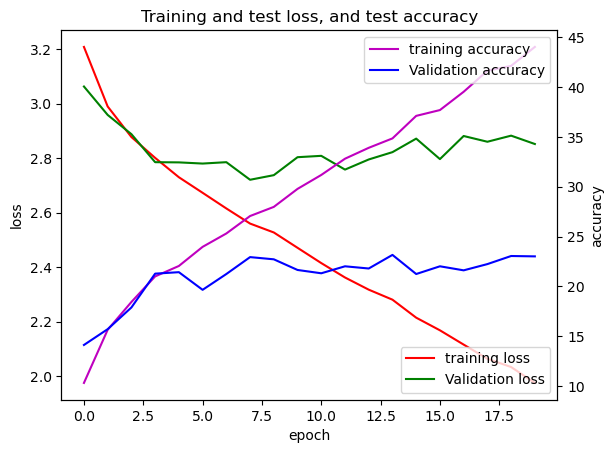

In [10]:
results_path = results_path_mlp+ '1layer20epochs.pt'
MLP_data = torch.load(results_path, map_location=device) # by doing map_location=device, you can use trained model on GPU --> to test on CPU
acc_loss_plot(MLP_data)

From the plot we can see that after the 4th epoch validation accuracy can not rise further than 20-22% and over-fitting occurs

In [12]:
#TO COMPLETE --> Running your CNN model class
from torch.optim.lr_scheduler import StepLR
nepochs = 10
ROOT = './'

results_path_cnn = ROOT+'results/cnn/'
os.makedirs(results_path_cnn, exist_ok = True)

def train_cnn(cnn_model, nepochs = nepochs,learning_rate=0.001, train_loader = train_loader, val_loader=val_loader):
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn_model.parameters(), lr=learning_rate)
    scheduler = StepLR(optimizer, step_size=4, gamma=0.5)    
    statsrec = np.zeros((4,nepochs))
    
    for epoch in range(nepochs):  # loop over the dataset multiple times
        cnn_model.train()
        running_loss = 0.0   # accumulated loss (for mean loss)
        n = 0                # number of minibatches
        batch_acc_sum= 0
        for data in train_loader:
            inputs, labels = data
    
            inputs = inputs.to(device)
            labels = labels.to(device)
    
            # Zero the parameter gradients
            optimizer.zero_grad()
    
            # Forward, backward, and update parameters
            outputs = cnn_model(inputs) 
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
    
            # accumulate loss
            running_loss += loss.item()
            n += 1
    
            # accumulate data for accuracy
            batch_acc = topk_accuracy(outputs, labels, topk=(1,))[0].item()
            batch_acc_sum += batch_acc
            
        scheduler.step()
        
        atrn = batch_acc_sum / n
        # collect together statistics for this epoch
        ltrn = running_loss/n
        cnn_model.eval()
        ltst, atst, val_scores, val_labels = stats(val_loader, cnn_model)

        if epoch == nepochs - 1:
            val_scores_final = val_scores
            val_labels_final = val_labels
    
        #ltst = ltst.item() #item() moves the tensor data with 1 element to CPU
        statsrec[:,epoch] = (ltrn, atrn, ltst, atst)
        print(f"epoch: {epoch} training loss: {ltrn: .3f} training accuracy: {atrn: .1f} test loss: {ltst: .3f} test accuracy: {atst: .1f}")
        
    return {"state_dict": cnn_model.state_dict(), "stats": statsrec, "val_scores": val_scores_final, "val_labels": val_labels_final}

In [26]:
cnn_model = CNNModel().to(device)
model_data = train_cnn(cnn_model)

epoch: 0 training loss:  2.810 training accuracy:  19.7 test loss:  2.578 test accuracy:  25.3
epoch: 1 training loss:  2.307 training accuracy:  32.8 test loss:  2.261 test accuracy:  34.5
epoch: 2 training loss:  1.993 training accuracy:  41.4 test loss:  2.301 test accuracy:  35.7
epoch: 3 training loss:  1.705 training accuracy:  49.0 test loss:  2.064 test accuracy:  41.7
epoch: 4 training loss:  1.153 training accuracy:  64.7 test loss:  1.960 test accuracy:  47.3
epoch: 5 training loss:  0.818 training accuracy:  74.2 test loss:  2.124 test accuracy:  46.4
epoch: 6 training loss:  0.536 training accuracy:  83.3 test loss:  2.288 test accuracy:  45.6
epoch: 7 training loss:  0.306 training accuracy:  90.8 test loss:  2.665 test accuracy:  47.1
epoch: 8 training loss:  0.113 training accuracy:  97.3 test loss:  2.782 test accuracy:  48.6
epoch: 9 training loss:  0.057 training accuracy:  98.8 test loss:  3.058 test accuracy:  48.0


In [27]:
# save network parameters, losses and accuracy
saveCkpt_cnn = results_path_cnn+ f'cnnclassifier{nepochs}epochs.pt'
torch.save(model_data, saveCkpt_cnn)

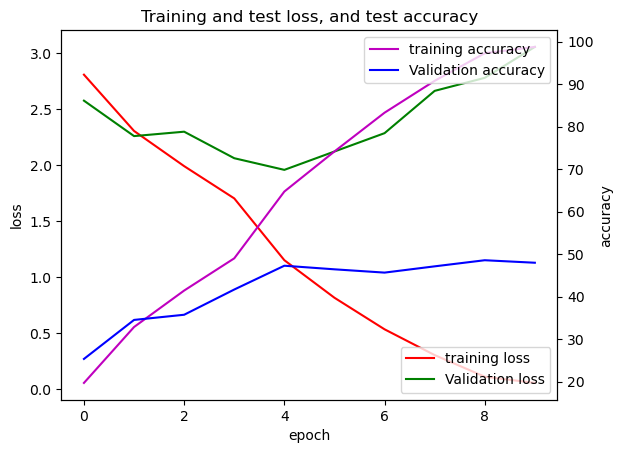

In [28]:
# Your graph
results_path = ROOT+'results/cnn/cnnclassifier10epochs.pt'
cnn_data = torch.load(results_path, map_location=device) # by doing map_location=device, you can use trained model on GPU --> to test on CPU
acc_loss_plot(cnn_data)

From the plot we can see that after approximately 3rd epoch overfitting occurs and training and validation accuracies diverge (For next plots and calculations I used a trained model with 3 epoch) However, the CNN model was able to achieve higher accuracy than the simple MLP model, because the convolutional layers in CNN were able to capture feature maps from the images in order for model to be able to classify the images.

> Comment on your model and the results you have obtained. This should include the number of parameters for each of your models and briefly explain why one should use CNN over MLP for the image classification problem.

### 2.2 Generating confusion matrix and ROC curves (6 marks)
- Use your CNN architecture with best accuracy to generate two confusion matrices, one for the training set and another for the validation set. Remember to use the whole validation and training sets, and to include all your relevant code. Display the confusion matrices in a meaningful way which clearly indicates what percentage of the data is represented in each position.
- Display an ROC curve for the two top and two bottom classes with area under the curve

In [127]:
nepochs = 3
cnn_model = CNNModel().to(device)
model_data = train_cnn(cnn_model, nepochs=nepochs)

epoch: 0 training loss:  2.766 training accuracy:  20.1 test loss:  2.437 test accuracy:  31.3
epoch: 1 training loss:  2.297 training accuracy:  32.8 test loss:  2.188 test accuracy:  36.8
epoch: 2 training loss:  1.983 training accuracy:  41.6 test loss:  2.098 test accuracy:  41.6


In [29]:
saveCkpt_cnn = results_path_cnn+ f'cnnclassifier{nepochs}epochs.pt'
torch.save(model_data, saveCkpt_cnn)

Following Cell calculates the confusion matrix

In [53]:
# Your code here!
classes = np.arange(0, 30)

# initialise confusion matrix

def confusion_matrix(data_loader):
    nclasses = classes.shape[0]
    d = torch.load(results_path_cnn + 'cnnclassifier3epochs.pt')
# now load the parameter state into the current model (make sure this is the right model).
    cnn_model.load_state_dict(d["state_dict"])
    cnfm = np.zeros((nclasses,nclasses),dtype=int)
    
    with torch.no_grad():
        for data in data_loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = cnn_model(images)
     
            _, predicted = torch.max(outputs, 1)
    
    
            # accumulate into confusion matrix
            for i in range(labels.size(0)):
                cnfm[labels[i].item(),predicted[i].item()] += 1
    return cnfm

Following function plots the confusion matrix

In [54]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):

    if cmap is None:
        cmap = plt.get_cmap('Oranges')

    plt.figure(figsize=(11, 11))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylim(len(classes)-0.5, -0.5)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.savefig(title + '.png', dpi=500, bbox_inches = 'tight')
    plt.show()

In [32]:
val_cnfm = confusion_matrix(val_loader)
train_cnfm = confusion_matrix(train_loader)

In [55]:
class_names = pd.read_csv("data/class.txt", delimiter= "	", header= None)
target_names = class_names[1].to_list()

## Confusion Matrix for train set

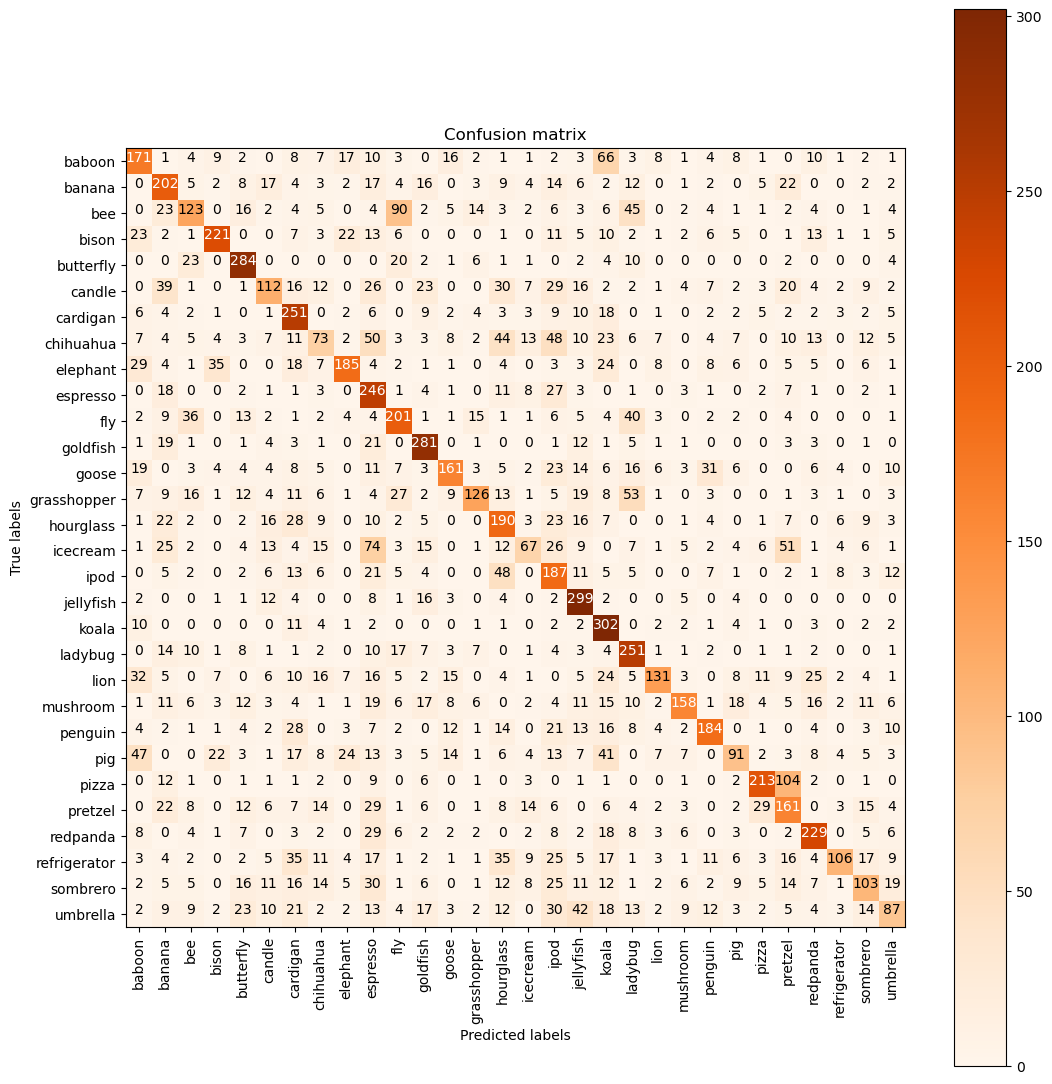

In [33]:
plot_confusion_matrix(train_cnfm, target_names=target_names)

## Confusion Matrix for validation set

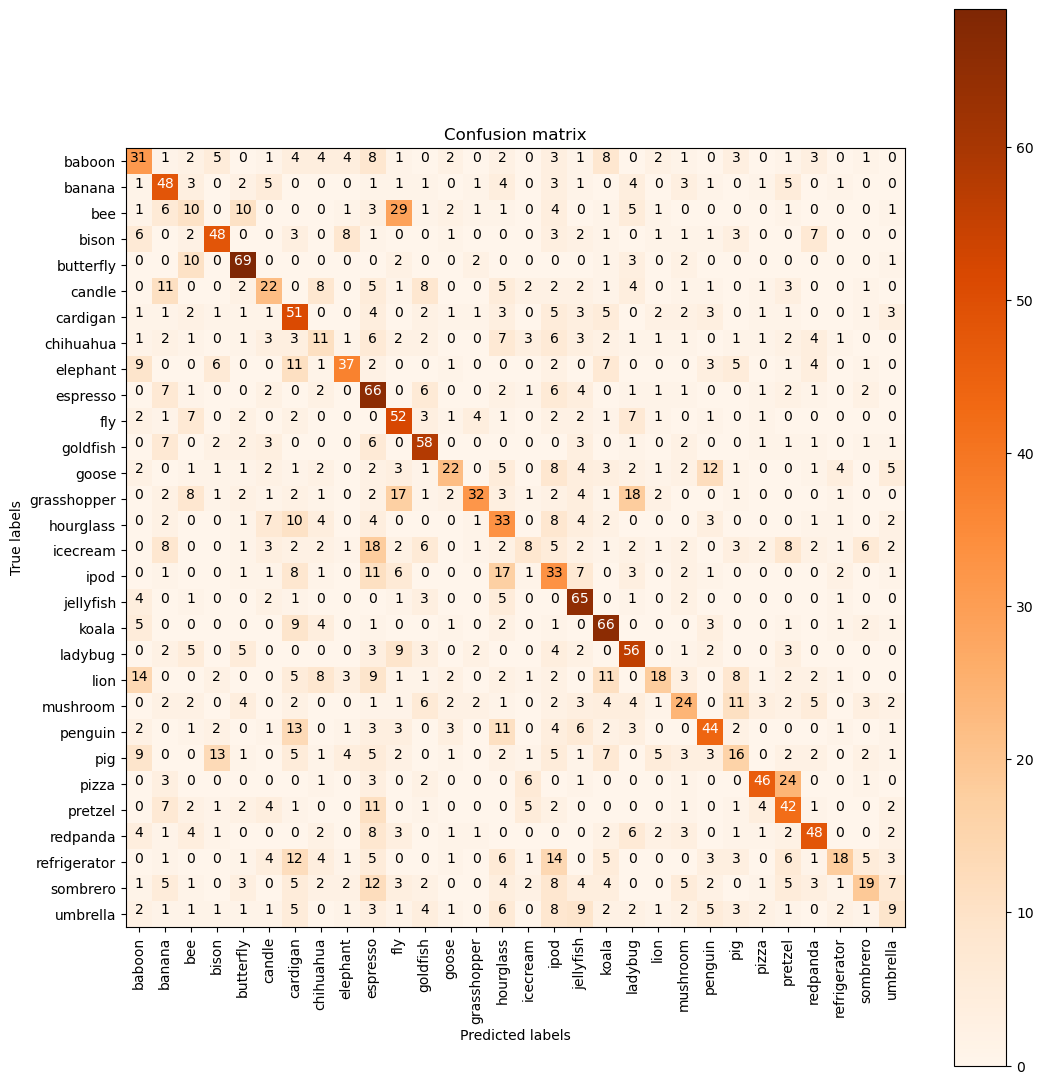

In [34]:
plot_confusion_matrix(val_cnfm, target_names=target_names)

Following Cells calculate the auc scores and plot the roc curve

In [133]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
def calculate_class_auc_scores(scores, true_labels):
    n_classes = scores.shape[1]
    auc_scores = np.zeros(n_classes)
    for i in range(n_classes):
        # Convert to binary labels for the current class
        binary_labels = (true_labels == i).astype(int)
        # Compute ROC AUC
        fpr, tpr, _ = roc_curve(binary_labels, scores[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores[i] = roc_auc
    return auc_scores

In [132]:
def plot_selected_roc_curves(scores, true_labels, auc_scores, classes):
    # Identify top and bottom classes based on AUC
    sorted_indices = np.argsort(auc_scores)
    top_classes = sorted_indices[-2:]  # Top 2 classes
    bottom_classes = sorted_indices[:2]  # Bottom 2 classes

    selected_classes = np.concatenate([top_classes, bottom_classes])

    plt.figure(figsize=(10, 8))

    for i in selected_classes:
        binary_labels = (true_labels == i).astype(int)
        fpr, tpr, _ = roc_curve(binary_labels, scores[:, i])
        plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_scores[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Top and Bottom Classes by AUC')
    plt.legend(loc="lower right")
    plt.show()

In [139]:
val_labels = model_data['val_labels']
val_scores = model_data['val_scores']

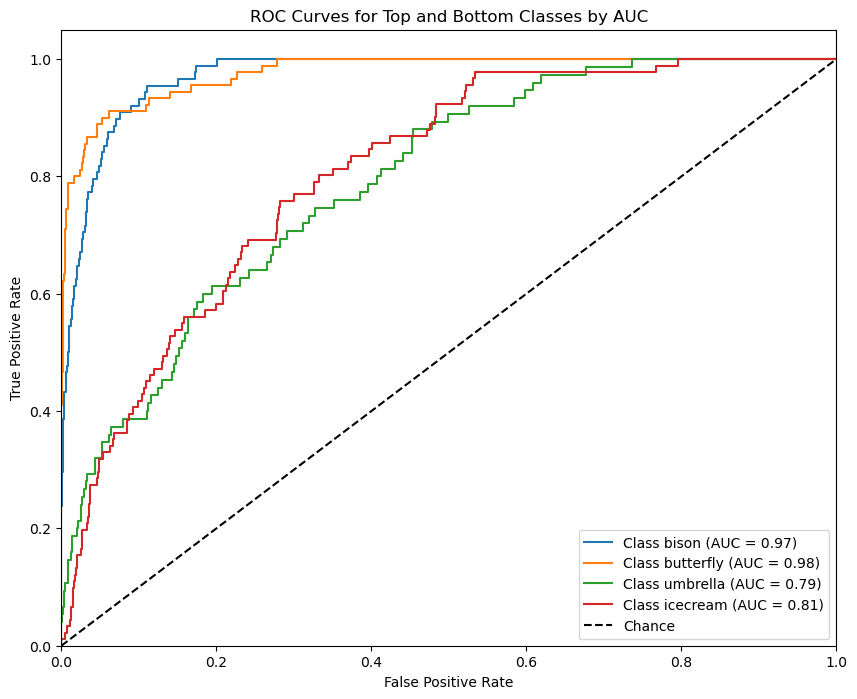

In [138]:
# Calculate AUC scores for each class
auc_scores = calculate_class_auc_scores(val_scores, val_labels)
plot_selected_roc_curves(val_scores, val_labels, auc_scores, classes)

### Redesign your CNN model (optional)
> This is optional and does not carry any marks. Often to tackle model underfitting we tend to make more complex network design. Depending on your observation, you can improve your model if you wish. 

In [ ]:
# Your code here (optional)

**Note: All questions below here relates to the CNN model only and not an MLP model! You are advised to use your final CNN model only for each of the questions below.**

### 2.3 Strategies for tackling overfitting (18 marks)
Using your (final) CNN model perform the strategies below to avoid overfitting problems. You can resuse the network weights from previous training, often referred to as ``fine tuning``. 
*   **2.3.1** Data augmentation
*   **2.3.2** Dropout
*   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)

> Plot loss and accuracy graphs per epoch side by side for each implemented strategy.

#### 2.3.1 Data augmentation (6 marks)

> Implement at least five different data augmentation techniques that should include both photometric and geometric augmentations. 

> Provide graphs and comment on what you observe.


In [33]:
# Your code here!
trnsfrm = transforms.Compose([
    transforms.ToTensor(),
    transforms.ColorJitter(hue=0.2, saturation=0.2, brightness=0.2, contrast=0.2),  
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.9, 1.1)),    
    transforms.RandomHorizontalFlip(p=0.5),                                                                                  
    transforms.RandomRotation(degrees=15),                                         
])
tinydata = CustomDataset(root = "./data/train_set",transform=trnsfrm, valid_size=0.2, random_seed=0)
train_loader, val_loader = tinydata.get_loaders()

In [34]:
nepochs=10
cnn_model = CNNModel().to(device)
aug_cnn_model = train_cnn(cnn_model, nepochs=nepochs, train_loader= train_loader, val_loader= val_loader)

epoch: 0 training loss:  3.104 training accuracy:  12.6 test loss:  2.983 test accuracy:  15.3
epoch: 1 training loss:  2.779 training accuracy:  20.5 test loss:  2.838 test accuracy:  20.8
epoch: 2 training loss:  2.610 training accuracy:  25.6 test loss:  2.696 test accuracy:  23.4
epoch: 3 training loss:  2.470 training accuracy:  28.9 test loss:  2.532 test accuracy:  27.5
epoch: 4 training loss:  2.242 training accuracy:  35.1 test loss:  2.307 test accuracy:  34.5
epoch: 5 training loss:  2.139 training accuracy:  37.8 test loss:  2.188 test accuracy:  37.9
epoch: 6 training loss:  2.068 training accuracy:  39.8 test loss:  2.132 test accuracy:  39.8
epoch: 7 training loss:  1.997 training accuracy:  41.8 test loss:  2.106 test accuracy:  39.3
epoch: 8 training loss:  1.833 training accuracy:  45.9 test loss:  1.996 test accuracy:  43.9
epoch: 9 training loss:  1.784 training accuracy:  47.1 test loss:  1.965 test accuracy:  44.9


In [35]:
saveCkpt_cnn_aug = results_path_cnn+ f'cnnclassifieraugmented{nepochs}epochs.pt'
torch.save(aug_cnn_model, saveCkpt_cnn_aug)

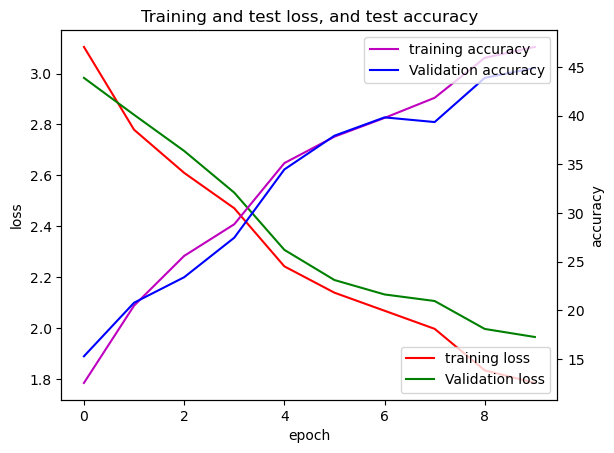

In [36]:
results_path = ROOT+'results/cnn/cnnclassifieraugmented10epochs.pt'
cnn_data = torch.load(results_path, map_location=device) # by doing map_location=device, you can use trained model on GPU --> to test on CPU
acc_loss_plot(cnn_data)

From the plot we can see that augmenting the images helped with over-fitting and now validation accuracy has reacher higher number (44.9%) at epoch 9 while train accuracy is not much higher(47.1%). Previously divergence between train and validation accuracy happened from epoch 3 and with lower accuracy for validation.

#### 2.3.2 Dropout (6 marks)

> Implement dropout in your model 

> Provide graphs and comment on your choice of proportion used.

In [5]:
# Redefining the Model Class with introduction of dropout 
import torch.nn as nn
import torch.nn.functional as F

class CNNModelDrop(nn.Module):
    def __init__(self):
        super(CNNModelDrop, self).__init__()
        # Convolutional layers
        self.Conv2d1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.Conv2d2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.Conv2d3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2)
        self.bn3 = nn.BatchNorm2d(64)
        self.Conv2d4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)

        # Pooling layer
        self.MaxPool2d = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 30)
        
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.bn1(F.relu(self.Conv2d1(x)))
        x = self.MaxPool2d(x)
        x = self.bn2(F.relu(self.Conv2d2(x)))
        x = self.MaxPool2d(x)
        x = self.bn3(F.relu(self.Conv2d3(x)))
        x = self.MaxPool2d(x)
        x = self.bn4(F.relu(self.Conv2d4(x)))
        x = self.MaxPool2d(x)


        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        out = self.fc3(x)
        return out

In [38]:
tinydata = CustomDataset(root = "./data/train_set", valid_size=0.2, random_seed=0)
train_loader, val_loader = tinydata.get_loaders()

In [59]:
nepochs=15
cnn_model = CNNModelDrop().to(device)
drop_cnn_model = train_cnn(cnn_model, nepochs=nepochs)

epoch: 0 training loss:  3.246 training accuracy:  10.5 test loss:  2.865 test accuracy:  18.5
epoch: 1 training loss:  2.947 training accuracy:  16.8 test loss:  2.661 test accuracy:  24.3
epoch: 2 training loss:  2.788 training accuracy:  20.3 test loss:  2.491 test accuracy:  27.1
epoch: 3 training loss:  2.650 training accuracy:  23.9 test loss:  2.467 test accuracy:  30.8
epoch: 4 training loss:  2.410 training accuracy:  29.6 test loss:  2.194 test accuracy:  37.2
epoch: 5 training loss:  2.264 training accuracy:  33.7 test loss:  2.144 test accuracy:  38.7
epoch: 6 training loss:  2.154 training accuracy:  36.9 test loss:  2.120 test accuracy:  39.5


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x00000249C56DCEA0>
Traceback (most recent call last):
  File "C:\Users\shaha\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "C:\Users\shaha\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py", line 1437, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
                                   ^^^^^^^^^^^^^^^^^^^^
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


epoch: 7 training loss:  2.057 training accuracy:  39.5 test loss:  2.032 test accuracy:  42.4
epoch: 8 training loss:  1.838 training accuracy:  45.3 test loss:  1.910 test accuracy:  45.8
epoch: 9 training loss:  1.725 training accuracy:  48.1 test loss:  1.883 test accuracy:  45.6
epoch: 10 training loss:  1.648 training accuracy:  50.5 test loss:  1.886 test accuracy:  47.1
epoch: 11 training loss:  1.554 training accuracy:  53.5 test loss:  1.891 test accuracy:  47.1
epoch: 12 training loss:  1.443 training accuracy:  55.7 test loss:  1.835 test accuracy:  49.3
epoch: 13 training loss:  1.369 training accuracy:  57.3 test loss:  1.842 test accuracy:  48.9
epoch: 14 training loss:  1.293 training accuracy:  59.6 test loss:  1.829 test accuracy:  49.2


In [60]:
saveCkpt_cnn_drop = results_path_cnn+ f'cnnclassifierdrop{nepochs}epochs.pt'
torch.save(drop_cnn_model, saveCkpt_cnn_drop)

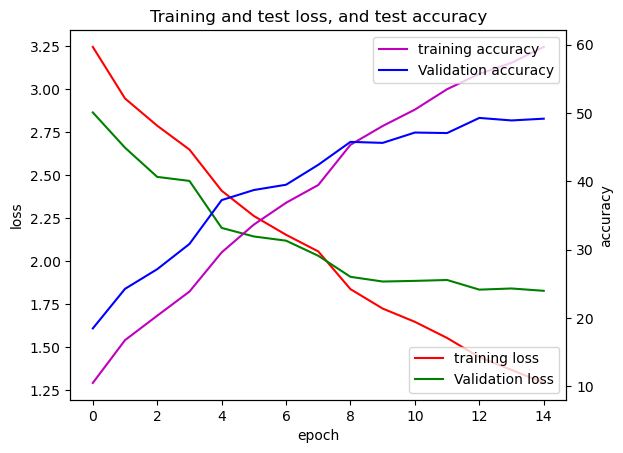

In [61]:
results_path = saveCkpt_cnn_drop
cnn_data = torch.load(results_path, map_location=device) # by doing map_location=device, you can use trained model on GPU --> to test on CPU
acc_loss_plot(cnn_data)

Here A separate method (dropout) is applied to prevent over-fitting (without implementing augmentation) Similar to augmentation we can see that accuracy for validation reached a higher number than a model without dropout (47.1%) and over-fitting occurred after epoch 8.

#### 2.3.3 Hyperparameter tuning (6 marks)

> Use learning rates [0.1, 0.001, 0.0001].

> Provide graphs each for loss and accuracy at three different learning rates in a single graph.

In [62]:
# Your code here!
# Train models for each learning rate and save results
lrs = [0.1, 0.001, 0.0001]
nepochs = 10
results_paths = []

for lr in lrs:
    cnn_model = CNNModel().to(device)
    lr_cnn_model = train_cnn(cnn_model, nepochs=nepochs, learning_rate=lr)
    saveCkpt_cnn = results_path_cnn + f'cnnclassifierlr:{lr}.pt'
    torch.save(lr_cnn_model, saveCkpt_cnn)
    results_paths.append(saveCkpt_cnn)

epoch: 0 training loss:  19.169 training accuracy:  3.4 test loss:  3.428 test accuracy:  3.2
epoch: 1 training loss:  3.433 training accuracy:  3.2 test loss:  3.431 test accuracy:  2.9
epoch: 2 training loss:  3.434 training accuracy:  3.5 test loss:  3.415 test accuracy:  3.3
epoch: 3 training loss:  3.435 training accuracy:  2.8 test loss:  3.438 test accuracy:  3.2
epoch: 4 training loss:  3.419 training accuracy:  3.4 test loss:  3.424 test accuracy:  3.3
epoch: 5 training loss:  3.420 training accuracy:  3.3 test loss:  3.419 test accuracy:  3.2
epoch: 6 training loss:  3.417 training accuracy:  3.2 test loss:  3.421 test accuracy:  3.2
epoch: 7 training loss:  3.418 training accuracy:  3.6 test loss:  3.413 test accuracy:  3.7
epoch: 8 training loss:  3.411 training accuracy:  3.5 test loss:  3.410 test accuracy:  3.3
epoch: 9 training loss:  3.411 training accuracy:  3.2 test loss:  3.409 test accuracy:  2.9
epoch: 0 training loss:  2.768 training accuracy:  20.9 test loss:  2

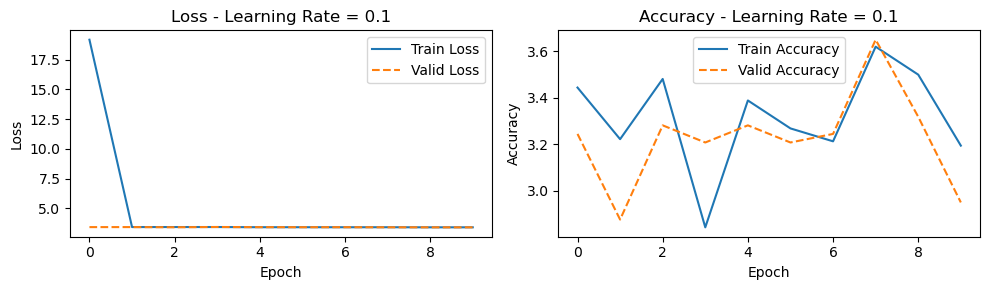

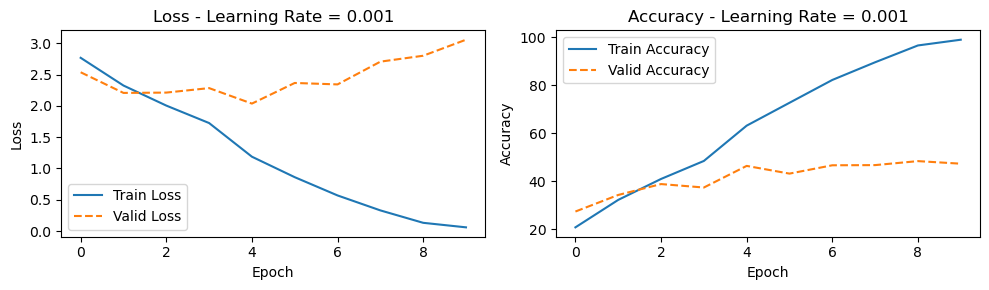

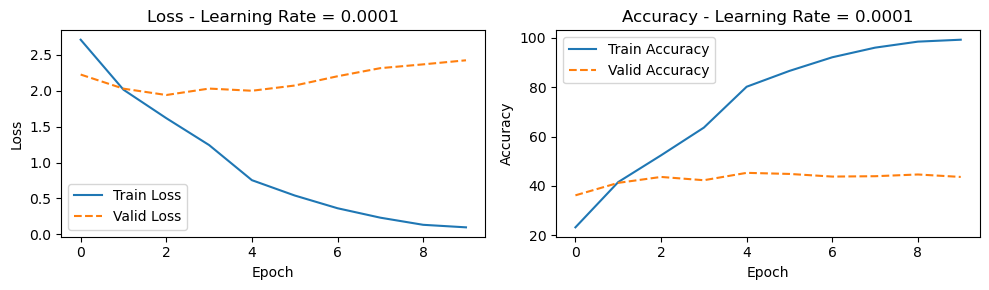

In [75]:
lrs = [0.1, 0.001, 0.0001]
results_paths = ["cnnclassifierlr:0.1.pt", "cnnclassifierlr:0.001.pt", "cnnclassifierlr:0.0001.pt"]
device = 'cpu'  

# Plot loss and accuracy for each learning rate
for i, lr in enumerate(lrs):
    cnn_data = torch.load(results_path_cnn + results_paths[i], map_location=device)

    plt.figure(figsize=(10, 3))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(cnn_data['stats'][0], label='Train Loss')
    plt.plot(cnn_data['stats'][2], label='Valid Loss', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss - Learning Rate = {lr}')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(cnn_data['stats'][1], label='Train Accuracy')
    plt.plot(cnn_data['stats'][3], label='Valid Accuracy', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy - Learning Rate = {lr}')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [78]:
tinydata = CustomDataset(root = "./data/train_set",transform=trnsfrm, valid_size=0.2, random_seed=0)
train_loader, val_loader = tinydata.get_loaders()

In [80]:
nepochs=5
drop_cnn_model = CNNModelDrop().to(device)

In [86]:
drop_cnn_data = train_cnn(drop_cnn_model, nepochs=nepochs, train_loader=train_loader, val_loader=val_loader)

epoch: 0 training loss:  1.749 training accuracy:  50.1 test loss:  1.817 test accuracy:  49.3
epoch: 1 training loss:  1.745 training accuracy:  49.4 test loss:  1.746 test accuracy:  51.0
epoch: 2 training loss:  1.766 training accuracy:  48.8 test loss:  1.800 test accuracy:  48.7
epoch: 3 training loss:  1.759 training accuracy:  49.8 test loss:  1.884 test accuracy:  47.4
epoch: 4 training loss:  1.640 training accuracy:  52.7 test loss:  1.709 test accuracy:  52.1
epoch: 5 training loss:  1.616 training accuracy:  53.0 test loss:  1.671 test accuracy:  52.2
epoch: 6 training loss:  1.596 training accuracy:  53.7 test loss:  1.636 test accuracy:  53.9
epoch: 7 training loss:  1.573 training accuracy:  54.0 test loss:  1.658 test accuracy:  52.8
epoch: 8 training loss:  1.508 training accuracy:  56.4 test loss:  1.617 test accuracy:  54.6
epoch: 9 training loss:  1.485 training accuracy:  56.1 test loss:  1.667 test accuracy:  51.9


In [92]:
saveCkpt_cnn_drop = results_path_cnn+ f'cnnclassifierdrop5epochs.pt'
torch.save(drop_cnn_model, saveCkpt_cnn_drop)

### 3 Model testing [10 marks]
Online evaluation of your model performance on the test set. 

> Prepare the dataloader for the testset.

> Write evaluation code for writing predictions.

> Upload it to Kaggle submission page (6 marks)


#### 3.1 Test class and predictions (4 marks)

> Build a test class, prepare a test dataloader and generate predictions

Create a PyTorch ```Dataset``` for the unlabeled test data in the test_set folder of the Kaggle competition and generate predictions using your final model. Test data can be downloaded [here](https://www.kaggle.com/competitions/comp5623m-artificial-intelligence/data?select=test_set).

In [52]:
#Creating a class for unlabeled test dataset
class UnlabeledTestDataset(Dataset):
    def __init__(self, test_dir, transform):
        self.test_dir = test_dir
        self.transform = transform
        all_imgs = os.listdir(test_dir)
        self.total_imgs = natsorted(all_imgs)

    def __len__(self):
        return len(self.total_imgs)

    def __getitem__(self, idx):
        img_loc = os.path.join(self.test_dir, self.total_imgs[idx])
        image = Image.open(img_loc).convert("RGB")
        tensor_image = self.transform(image)
        return tensor_image, self.total_imgs[idx]

In [102]:
# Your code here!
test_dir = './data/test_set'

model_path = './results/cnn/cnnclassifierdrop5epochs.pt'


model = torch.load(model_path, map_location=torch.device('cpu'))

In [53]:
# Create the test dataset
test_set = UnlabeledTestDataset(test_dir="./data/test_set", transform=transforms.ToTensor())

In [95]:
def predict_image(model, image_tensor):

    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted = torch.max(output, 1)
    return predicted.item()

#model.to(device)

prediction_records = []

for image_tensor, file_name in test_set:
    image_tensor = image_tensor.to(device)
    prediction = predict_image(model, image_tensor.unsqueeze(0))
    prediction_records.append((file_name, prediction))

#### 3.2 Prepare your submission and upload to Kaggle  (6 marks)

Save all test predictions to a CSV file and submit it to the private class Kaggle competition. **Please save your test CSV file submissions using your student username (the one with letters, e.g., ``sc15jb``, not the ID with only numbers)**, for example, `sc15jb.csv`. That will help us to identify your submissions.

The CSV file must contain only two columns: ‘Id’ and ‘Category’ (predicted class ID) as shown below:

```txt
Id,Category
28d0f5e9_373c.JPEG,2
bbe4895f_40bf.JPEG,18
```

The ‘Id’ column should include the name of the image. It is important to keep the same name as the one on the test set. Do not include any path, just the name of file (with extension). Your csv file must contain 1501 rows, one for each image on test set and 1 row for the headers. [To submit please click here.](https://www.kaggle.com/t/917fe52f6a3c4855880a24b34f26db07)

> You may submit multiple times. We will use your personal top entry for allocating marks for this [6 marks]. 


In [96]:
df_predictions = pd.DataFrame(prediction_records, columns=['ID', 'Category'])

csv_file_path = 'mm23ssa.csv'
df_predictions.to_csv(csv_file_path, index=False)


### 4 Model Fine-tuning/transfer learning on CIFAR10 dataset  [16 marks]

Fine-tuning is a way of applying or utilizing transfer learning. It is a process that takes a model that has already been trained for one given task and then tunes or tweaks the model to make it perform a second similar task. You can perform fine-tuning in following fashion:

- Train an entire model: Start training model from scratch (large dataset, more computation)

- Train some layers, freeze others: Lower layer features are general (problem independent) while higher layer features are specific (problem dependent – freeze)

- Freeze convolution base and train only last FC layers (small dataset and lower computation) 

> **Configuring your dataset**
   - Download your dataset using ``torchvision.datasets.CIFAR10`` [explained here](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)
   - Split training dataset into training and validation set similar to above. *Note that the number of categories here is only 10*


In [13]:
# Your code here! 
# Load the datasets
ROOT = "./"

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_set = torchvision.datasets.CIFAR10(
    root=ROOT+'cifar',
    train=True,
    download=True,
    transform= preprocess
)

valid_set = torchvision.datasets.CIFAR10(
    root=ROOT+'cifar',
    train=False,
    download=True,
    transform=preprocess
)

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=16,
    shuffle=True,
    num_workers=2
)

valid_loader = torch.utils.data.DataLoader(
    valid_set,
    batch_size=24, # Forward pass only so batch size can be larger
    shuffle=False,
    num_workers=2
)

Files already downloaded and verified
Files already downloaded and verified


> Load pretrained AlexNet from PyTorch - use model copies to apply transfer learning in different configurations

In [14]:
# Your code here! 
alexnet = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
alexnet = alexnet.to(device)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to C:\Users\shaha/.cache\torch\hub\v0.10.0.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\shaha/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [02:12<00:00, 1.84MB/s] 


#### 4.1 Apply transfer learning with pretrained model weights (6 marks)


> Configuration 1: No frozen layers

In [18]:
# Your model changes here - also print trainable parameters
alex_data = train_cnn(alexnet, nepochs=10, learning_rate=0.001, val_loader=valid_loader, train_loader=train_loader)
savept_alex = results_path_cnn+ f'alexpretrainednofreeze.pt'
torch.save(alex_data, savept_alex)

epoch: 0 training loss:  1.762 training accuracy:  35.3 test loss:  1.501 test accuracy:  44.9
epoch: 1 training loss:  1.538 training accuracy:  44.1 test loss:  1.525 test accuracy:  42.0
epoch: 2 training loss:  1.443 training accuracy:  48.3 test loss:  1.442 test accuracy:  48.2
epoch: 3 training loss:  1.396 training accuracy:  50.1 test loss:  1.342 test accuracy:  52.9
epoch: 4 training loss:  1.193 training accuracy:  57.4 test loss:  1.088 test accuracy:  61.6
epoch: 5 training loss:  1.131 training accuracy:  60.1 test loss:  1.068 test accuracy:  63.2
epoch: 6 training loss:  1.089 training accuracy:  61.5 test loss:  1.071 test accuracy:  62.2
epoch: 7 training loss:  1.052 training accuracy:  63.1 test loss:  1.006 test accuracy:  64.9
epoch: 8 training loss:  0.921 training accuracy:  67.6 test loss:  0.932 test accuracy:  68.1
epoch: 9 training loss:  0.872 training accuracy:  69.3 test loss:  0.881 test accuracy:  69.5


In [105]:
# for name,param in alexnet.named_parameters():
#     print(name)

for name, param in alexnet.named_parameters():
    print(name, param.requires_grad)

features.0.weight True
features.0.bias True
features.3.weight True
features.3.bias True
features.6.weight True
features.6.bias True
features.8.weight True
features.8.bias True
features.10.weight True
features.10.bias True
classifier.1.weight True
classifier.1.bias True
classifier.4.weight True
classifier.4.bias True
classifier.6.weight True
classifier.6.bias True


#### 4.2 Fine-tuning model with frozen layers (6 marks)

> Configuration 2: Frozen base convolution blocks

In [21]:
# Your changes here - also print trainable parameters
alexnet2 = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
alexnet2 = alexnet2.to(device)
for param in alexnet2.features.parameters():
        param.requires_grad = False
for name, param in alexnet2.named_parameters():
    print(name, param.requires_grad)

Using cache found in C:\Users\shaha/.cache\torch\hub\pytorch_vision_v0.10.0


features.0.weight False
features.0.bias False
features.3.weight False
features.3.bias False
features.6.weight False
features.6.bias False
features.8.weight False
features.8.bias False
features.10.weight False
features.10.bias False
classifier.1.weight True
classifier.1.bias True
classifier.4.weight True
classifier.4.bias True
classifier.6.weight True
classifier.6.bias True


In [22]:
alex_data_freeze = train_cnn(alexnet2, nepochs=10, learning_rate=0.001, val_loader=valid_loader, train_loader=train_loader)
savept_alex = results_path_cnn+ f'alexpretrainedfreezecnn.pt'
torch.save(alex_data, savept_alex)

epoch: 0 training loss:  0.986 training accuracy:  67.6 test loss:  0.670 test accuracy:  77.6
epoch: 1 training loss:  0.754 training accuracy:  75.2 test loss:  0.594 test accuracy:  80.1
epoch: 2 training loss:  0.676 training accuracy:  77.8 test loss:  0.574 test accuracy:  80.4
epoch: 3 training loss:  0.621 training accuracy:  79.8 test loss:  0.541 test accuracy:  82.3
epoch: 4 training loss:  0.483 training accuracy:  84.0 test loss:  0.487 test accuracy:  83.5
epoch: 5 training loss:  0.445 training accuracy:  85.3 test loss:  0.463 test accuracy:  84.7
epoch: 6 training loss:  0.418 training accuracy:  86.1 test loss:  0.449 test accuracy:  85.3
epoch: 7 training loss:  0.393 training accuracy:  86.8 test loss:  0.440 test accuracy:  85.5
epoch: 8 training loss:  0.320 training accuracy:  89.3 test loss:  0.434 test accuracy:  85.8
epoch: 9 training loss:  0.298 training accuracy:  90.0 test loss:  0.425 test accuracy:  86.0


#### 4.3 Compare above configurations and comment on performances. (4 marks)

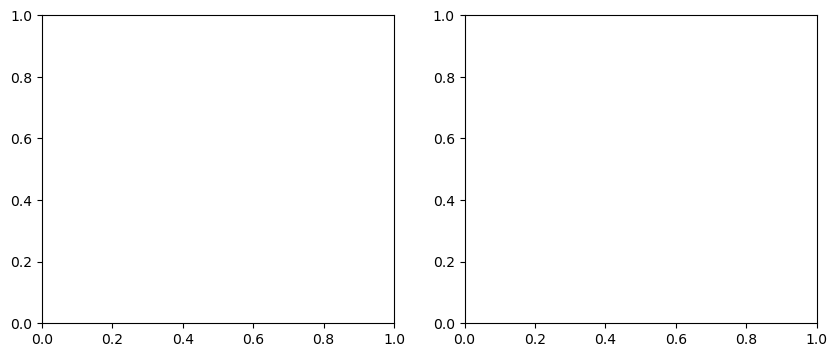

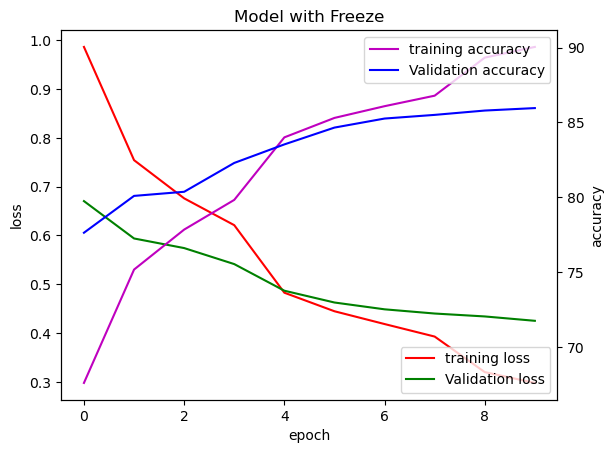

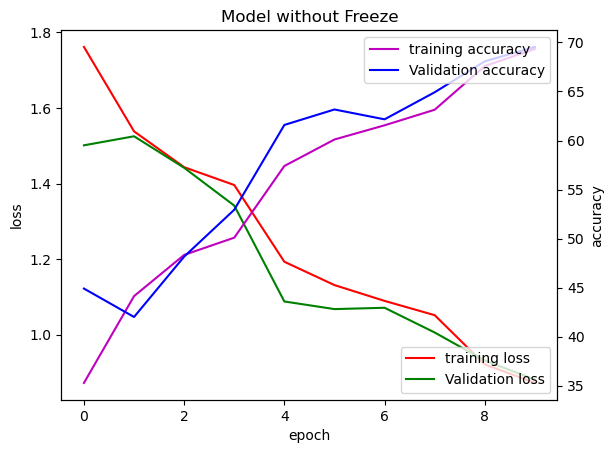

<Figure size 640x480 with 0 Axes>

In [27]:
# Your graphs here and please provide comment in markdown in another cell
def plot_side_by_side(data1, data2, title1, title2):
    global ax1
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    acc_loss_plot(data1, title=title1)
    ax1 = ax2  # Switch to the second subplot for the next plot
    acc_loss_plot(data2, title=title2)
    plt.tight_layout()
    plt.show()
plot_side_by_side(alex_data_freeze, alex_data, "Model with Freeze", "Model without Freeze")

Freezing the convolutional layers means we are leveraging the features that AlexNet learned on other possibly larger datasets. The observed higher accuracy for validation in the configuration with freezing convolutional layers (85%) result from the effective reuse of general features learned previously on a diverse dataset.
On the other hand, in configuration without freezing allowing all layers to train with more parameters adjusting to the CIFAR-10 data, the model can more easily memorize the training set. Overall not freezing layers can result in loss of pretrained knowledge and difficulty in adaptation to new datasets and possibly over-fitting although in this specific case overwriting was not witnessed until end of training 